In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

df = pd.read_csv("data/allendale-students.csv")

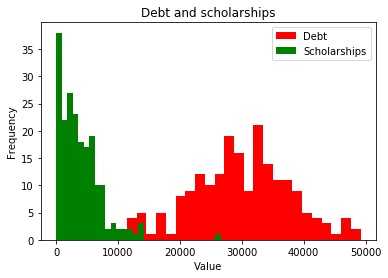

In [2]:
n_bins = 30
colors = ["red", "green"]
plt.hist(df.debt, bins=n_bins, color=colors[0])
plt.hist(df.scholarship, bins=n_bins, color=colors[1])
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title("Debt and scholarships")
labels= ["Debt","Scholarships"]
_ = plt.legend(labels)

In [3]:
df['scholarship_debt'] = df['debt']/ df['scholarship']

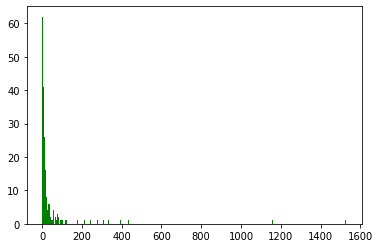

In [4]:
n_bins = 300
_ = plt.hist(df['scholarship_debt'], bins=n_bins, color=colors[1])


In [5]:

df['debt_sch_less_2'] = np.where(df['scholarship_debt'] < 2, "less", "greater")
df


,distance,scholarship,parents,car,housing,major,debt,scholarship_debt,debt_sch_less_2
0,40,1532,0.440,6,off campus,STEM,26389,17.225196,greater
1,30,7479,0.265,7,on campus,STEM,21268,2.843696,greater
2,130,2664,0.115,3,on campus,business,32312,12.129129,greater
3,120,1998,0.325,9,on campus,business,28539,14.283784,greater
4,30,1462,0.105,10,off campus,other,34867,23.848837,greater
...,...,...,...,...,...,...,...,...,...
195,30,5321,0.445,8,off campus,STEM,21873,4.110693,greater
196,50,5916,0.020,10,off campus,STEM,33122,5.598715,greater
197,410,5583,0.200,7,on campus,business,33666,6.030091,greater
198,320,1282,0.250,4,off campus,business,44262,34.525741,greater


In [6]:
df_with_dummies = pd.get_dummies(df).drop(columns=['housing_off campus', 'major_STEM']) 
df_with_dummies.columns = df_with_dummies.columns.str.replace(' ', '_')
df_with_dummies # off-campus and stem majors are reference catgories

,distance,scholarship,parents,car,debt,scholarship_debt,housing_on_campus,major_business,major_other,debt_sch_less_2_greater,debt_sch_less_2_less
0,40,1532,0.440,6,26389,17.225196,0,0,0,1,0
1,30,7479,0.265,7,21268,2.843696,1,0,0,1,0
2,130,2664,0.115,3,32312,12.129129,1,1,0,1,0
3,120,1998,0.325,9,28539,14.283784,1,1,0,1,0
4,30,1462,0.105,10,34867,23.848837,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
195,30,5321,0.445,8,21873,4.110693,0,0,0,1,0
196,50,5916,0.020,10,33122,5.598715,0,0,0,1,0
197,410,5583,0.200,7,33666,6.030091,1,1,0,1,0
198,320,1282,0.250,4,44262,34.525741,0,1,0,1,0


In [7]:
import statsmodels.api as sm
from itertools import permutations 
import statsmodels.formula.api as smf

In [8]:
predictors = df_with_dummies.drop(columns='debt')

In [18]:
cols = predictors.columns
output = []
for i in range(1, len(cols)):
    perm = permutations(cols[0:i])
    output.append(perm)

formula = []
for obj in list(output):
    for  perm in list(obj):
        if len(perm) < 5:
            formula.append(" + ".join(perm))
        

formula = ['debt ~ ' + x for x in formula]

In [20]:
adj_r = []

for model in formula:
    mod = smf.ols(formula=model, data=df_with_dummies)
    res = mod.fit()
    adj_r = np.append(adj_r, res.rsquared_adj)

adj_r



array([0.2443023 , 0.61104056, 0.61104056, 0.74272975, 0.74272975,
       0.74272975, 0.74272975, 0.74272975, 0.74272975, 0.74143108,
       0.74143108, 0.74143108, 0.74143108, 0.74143108, 0.74143108,
       0.74143108, 0.74143108, 0.74143108, 0.74143108, 0.74143108,
       0.74143108, 0.74143108, 0.74143108, 0.74143108, 0.74143108,
       0.74143108, 0.74143108, 0.74143108, 0.74143108, 0.74143108,
       0.74143108, 0.74143108, 0.74143108])